# **r ploting intergenic**

In [1]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(reshape2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
“package ‘dplyr’ was built under R version 3.6.3”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“package ‘tidyr’ was built under R version 3.6.3”
Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths



## **human intergenic**

In [2]:
inter_data <- read.csv("data/humanIntergenic/data_df_5kbp.csv")
inter_data <- inter_data[,2:98] #gets rid of the row names col 

In [3]:
inter_avMut <- apply(inter_data[,2:97],1,mean) #need to specify those rows so the "gens" col doesnt get included in the mean apply 

In [4]:
inter_sdMut <- apply(inter_data[,2:97],1,sd)#need to specify those rows so the "gens" col doesnt get included in the sd apply 

In [5]:
inter_data$avMut <- inter_avMut
inter_data$sdMut <- inter_sdMut
inter_data$stderrMut <- inter_data$sdMut/10

## **triplet frequency replicated**

In [6]:
triprep_data <- read.csv("data/tripletFreqRep/data_df_5kbp.csv")
triprep_data <- triprep_data[,2:101]

In [7]:
triprep_avMut <- apply(triprep_data[,2:100],1,mean)
triprep_sdMut <- apply(triprep_data[,2:100],1,sd)

In [8]:
triprep_data$avMut <- triprep_avMut
triprep_data$sdMut <- triprep_sdMut
triprep_data$stderrMut <- triprep_data$sdMut/10 # n samples = 100 . sqrt 100 = 10 

## **true random** 

In [9]:
random_data <- read.csv("data/trueRandom/data_df_5kbp.csv")
random_data <- random_data[,2:101]

In [10]:
random_data$avMut <- apply(random_data[,2:100],1,mean)
random_data$sdMut <- apply(random_data[,2:100],1,sd)
random_data$stderrMut <- random_data$sdMut / 10 

In [47]:
head(random_data)

gens,trial0,trial1,trial2,trial3,trial4,trial5,trial6,trial7,trial8,...,trial92,trial93,trial94,trial95,trial96,trial97,trial98,avMut,sdMut,stderrMut
0,6.127924e-05,6.331401e-05,6.165149e-05,6.278642e-05,5.893975e-05,5.913585e-05,6.110606e-05,6.210530e-05,6.067696e-05,...,6.070257e-05,6.104586e-05,5.949442e-05,6.110119e-05,6.192353e-05,6.042593e-05,6.341113e-05,6.157891e-05,1.696816e-06,1.696816e-07
1,6.115751e-05,6.322140e-05,6.156308e-05,6.266915e-05,5.904091e-05,5.913335e-05,6.099379e-05,6.200453e-05,6.056155e-05,...,6.060312e-05,6.093925e-05,5.938785e-05,6.100066e-05,6.182612e-05,6.031145e-05,6.331306e-05,6.150819e-05,1.687208e-06,1.687208e-07
2,6.106514e-05,6.313298e-05,6.156768e-05,6.265951e-05,5.903850e-05,5.900976e-05,6.099932e-05,6.199974e-05,6.045690e-05,...,6.049763e-05,6.082634e-05,5.938843e-05,6.099907e-05,6.171788e-05,6.042518e-05,6.340423e-05,6.146100e-05,1.677207e-06,1.677207e-07
3,6.095354e-05,6.312916e-05,6.147056e-05,6.253269e-05,5.903784e-05,5.889500e-05,6.090772e-05,6.189388e-05,6.033863e-05,...,6.049609e-05,6.082884e-05,5.939185e-05,6.090752e-05,6.172878e-05,6.031994e-05,6.330326e-05,6.139494e-05,1.681055e-06,1.681055e-07
4,6.083903e-05,6.302757e-05,6.135581e-05,6.252674e-05,5.903490e-05,5.899560e-05,6.090703e-05,6.188979e-05,6.022074e-05,...,6.051733e-05,6.082609e-05,5.939200e-05,6.090641e-05,6.161587e-05,6.020272e-05,6.342028e-05,6.134028e-05,1.676245e-06,1.676245e-07
5,6.072517e-05,6.292699e-05,6.136306e-05,6.252815e-05,5.903260e-05,5.889135e-05,6.090731e-05,6.189453e-05,6.010328e-05,...,6.041451e-05,6.082188e-05,5.929084e-05,6.090772e-05,6.151529e-05,6.020020e-05,6.341490e-05,6.129185e-05,1.678493e-06,1.678493e-07


## **plotting all together** 

In [11]:
dim(random_data[1:9996,])
dim(triprep_data)
dim(inter_data)

[1] 9996  103

[1] 9996  103

[1] 10000   100

In [12]:
#combine all data into one 
all_data <- random_data[1:9996,c("gens","avMut","sdMut","stderrMut")] 
colnames(all_data) <- c("gens","random_avMut","random_sdMut","random_stderrMut")

all_data$triprep_avMut <- triprep_data$avMut
all_data$triprep_sdMut <- triprep_data$sdMut
all_data$triprep_stderrMut <- triprep_data$stderrMut

all_data$inter_avMut <- inter_data$avMut[1:9996]
all_data$inter_sdMut <- inter_data$sdMut[1:9996]
all_data$inter_stderrMut <- inter_data$stderrMut[1:9996]

In [131]:
write.csv(all_data,"data/all_data_df_avMut_stderr.csv")

 folowing tutorial at https://stackoverflow.com/questions/64391103/ggplot2-make-multiple-lineribbons-with-legend

In [56]:
test_data <- all_data[,c("gens","random_avMut","triprep_avMut","inter_avMut")]

In [57]:
test_data$random_lo <- all_data$random_avMut-all_data$random_stderrMut
test_data$random_hi <- all_data$random_avMut+all_data$random_stderrMut

test_data$triprep_lo <- all_data$triprep_avMut-all_data$triprep_stderrMut
test_data$triprep_hi <- all_data$triprep_avMut+all_data$triprep_stderrMut

test_data$inter_lo <- all_data$inter_avMut-all_data$inter_stderrMut
test_data$inter_hi <- all_data$inter_avMut+all_data$inter_stderrMut

In [62]:
long_test_data <- pivot_longer(test_data, cols=!gens , names_to="line" , values_to="avMut" )

In [66]:
long_test_data$fill = NA
long_test_data$fill[grep( "random" , long_test_data$line  )] = "random"
long_test_data$fill[grep( "triprep" , long_test_data$line  )] = "triprep"
long_test_data$fill[grep( "inter" , long_test_data$line  )] = "inter"

In [90]:
long_test_data1 <- long_test_data %>% 
    mutate(line = gsub("inter_", "", line)) %>% 
    mutate(line = gsub("random_", "", line)) %>% 
    mutate(line = gsub("triprep_", "", line)) %>% 
    pivot_wider(id_cols = c(gens, fill), names_from = line, values_from = avMut)

In [132]:
head(long_test_data1)

gens,fill,avMut,lo,hi
0,random,6.157891e-05,6.140923e-05,6.174859e-05
0,triprep,3.797823e-05,3.786833e-05,3.808813e-05
0,inter,3.366473e-05,3.318564e-05,3.414381e-05
1,random,6.150819e-05,6.133946e-05,6.167691e-05
1,triprep,3.794659e-05,3.783760e-05,3.805559e-05
1,inter,3.364314e-05,3.316516e-05,3.412111e-05


Warning message:
“Removed 790 rows containing missing values (geom_path).”Saving 6.67 x 6.67 in image
Warning message:
“Removed 790 rows containing missing values (geom_path).”

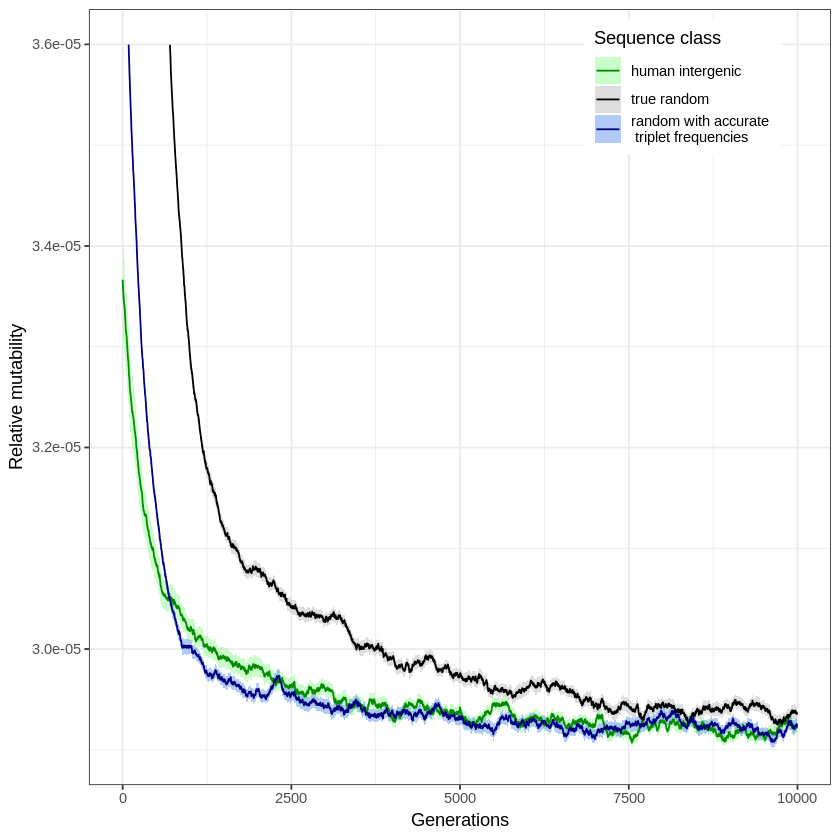

In [128]:
ggplot(long_test_data1) +
    geom_ribbon(aes(x=gens, ymin=lo, ymax=hi, fill = fill), alpha=0.5) +
    geom_line(aes(x=gens, y=avMut, color = fill)) +
    labs( y="Relative mutability" , x="Generations",color="Sequence class",fill="Sequence class")+
    scale_color_manual(labels=c(random = "true random", triprep = "random with accurate \n triplet frequencies", inter="human intergenic"),values = c(random = "black", triprep = "navy", inter="green4")) + 
    scale_fill_manual(labels=c(random = "true random", triprep = "random with accurate \n triplet frequencies", inter="human intergenic"),values = c(random = "grey", triprep = "cornflowerblue", inter="palegreen"))+
    ylim(2.9e-05, 3.6e-05)+
    theme_bw()+
    theme(legend.position = c(0.8,0.9)) # http://www.sthda.com/english/wiki/ggplot2-legend-easy-steps-to-change-the-position-and-the-appearance-of-a-graph-legend-in-r-software
# ggsave("plots/allSeqClass_100n_5kbp_2xCov_stderr.pdf")

In [74]:
# Set up data:
set.seed(47405)
x = 1:10
y1 = 1 + 0.1*x + rnorm(length(x),0,0.2)  # line 1
y2 = 2 + 0.2*x + rnorm(length(x),0,0.2)  # line 2
y1lo = y1 - 0.2  # ribbon 1 low
y1hi = y1 + 0.2  # ribbon 1 high
y2lo = y2 - 0.3  # ribbon 2 low
y2hi = y2 + 0.3  # ribbon 2 high

# Wide format data frame:
wideDF = data.frame( x=x , 
                     y1lo=y1lo , y1=y1 , y1hi=y1hi ,
                     y2lo=y2lo , y2=y2 , y2hi=y2hi )

# Long format data frame:
longDF = pivot_longer( wideDF , cols=!x , names_to="line" , values_to="y" )
longDF$fill = NA
longDF$fill[grep( "1" , longDF$line  )] = "y1"
longDF$fill[grep( "2" , longDF$line  )] = "y2"

longDF1 <- longDF %>% 
  mutate(line = gsub("\\d", "", line))





In [ ]:
longDF1 <-   pivot_wider(id_cols = c(x, fill), names_from = line, values_from = y)

In [72]:
head(longDF)

x,line,y,fill
1,y1lo,0.8924163,y1
1,y1,1.0924163,y1
1,y1hi,1.2924163,y1
1,y2lo,1.7873373,y2
1,y2,2.0873373,y2
1,y2hi,2.3873373,y2


In [71]:
longDF1

x,fill,ylo,y,yhi
1,y1,0.8924163,1.092416,1.292416
1,y2,1.7873373,2.087337,2.387337
2,y1,1.0304784,1.230478,1.430478
2,y2,2.0127683,2.312768,2.612768
3,y1,0.9968512,1.196851,1.396851
3,y2,2.0869064,2.386906,2.686906
4,y1,1.1778161,1.377816,1.577816
4,y2,2.3770755,2.677076,2.977076
5,y1,1.3574046,1.557405,1.757405
5,y2,2.9950992,3.295099,3.595099


In [143]:
head(longDF)

x,trial,value,fill
1,y1lo,0.8924163,y1
2,y1lo,1.0304784,y1
3,y1lo,0.9968512,y1
4,y1lo,1.1778161,y1
5,y1lo,1.3574046,y1
6,y1lo,1.0894606,y1


In [140]:
longDF1 <- longDF %>% 
    mutate(trial = gsub("\\d", "", trial)) %>% 
    spread()
    pivot_wider(id_cols = c(x, fill), names_from = trial, values_from = value)

ERROR: Error in pivot_wider(): could not find function "pivot_wider"


In [144]:
help(spread)

spread {tidyr},R Documentation
data,A data frame.
"key, value",Column names or positions. This is passed to tidyselect::vars_pull(). These arguments are passed by expression and support quasiquotation (you can unquote column names or column positions).
fill,"If set, missing values will be replaced with this value. Note that there are two types of missingness in the input: explicit missing values (i.e. NA), and implicit missings, rows that simply aren't present. Both types of missing value will be replaced by fill."
convert,"If TRUE, type.convert() with asis = TRUE will be run on each of the new columns. This is useful if the value column was a mix of variables that was coerced to a string. If the class of the value column was factor or date, note that will not be true of the new columns that are produced, which are coerced to character before type conversion."
drop,"If FALSE, will keep factor levels that don't appear in the data, filling in missing combinations with fill."
sep,"If NULL, the column names will be taken from the values of key variable. If non-NULL, the column names will be given by ""<key_name><sep><key_value>""."


In [119]:
spread(data, key, value)

x,y1lo,y1,y1hi,y2lo,y2,y2hi
1,0.8924163,1.092416,1.292416,1.787337,2.087337,2.387337
2,1.0304784,1.230478,1.430478,2.012768,2.312768,2.612768
3,0.9968512,1.196851,1.396851,2.086906,2.386906,2.686906
4,1.1778161,1.377816,1.577816,2.377076,2.677076,2.977076
5,1.3574046,1.557405,1.757405,2.995099,3.295099,3.595099
6,1.0894606,1.289461,1.489461,3.036123,3.336123,3.636123


In [106]:
head(i2d)
head(i1d)

bv,bin_count,bin_cumulative
0,0,0
1,0,0
2,0,0
3,2,2
4,1,3
5,2,5


bv,bin_count,bin_cumulative
0,0,0
1,1,1
2,1,2
3,2,4
4,3,7
5,2,9


In [108]:
head(i2d)
head(i1d)

bv,bin_count,bin_cumulative,data
0,0,0,i2d
1,0,0,i2d
2,0,0,i2d
3,2,2,i2d
4,1,3,i2d
5,2,5,i2d


bv,bin_count,bin_cumulative,data
0,0,0,i1d
1,1,1,i1d
2,1,2,i1d
3,2,4,i1d
4,3,7,i1d
5,2,9,i1d


In [109]:
i1d$data <- 'i1d'
i2d$data <- 'i2d'
i12d <- rbind.data.frame(i1d, i2d)

In [110]:
head(i12d)

bv,bin_count,bin_cumulative,data
0,0,0,i1d
1,1,1,i1d
2,1,2,i1d
3,2,4,i1d
4,3,7,i1d
5,2,9,i1d


In [117]:
library(pivot_longer)

ERROR: Error in library(pivot_longer): there is no package called ‘pivot_longer’


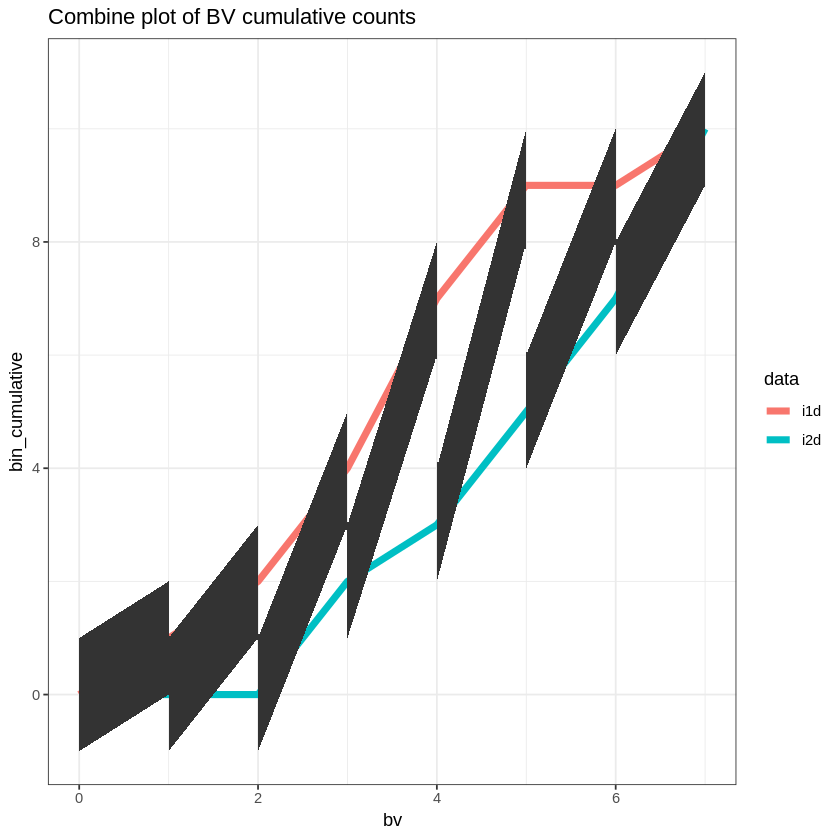

In [116]:
ggplot(i12d, aes(x = bv, y = bin_cumulative))+
    geom_line(aes(colour = data), size = 2)+
    geom_ribbon(aes(x=bv,ymin= bin_cumulative-1,ymax=bin_cumulative+1))+
    ggtitle("Combine plot of BV cumulative counts")+
    theme_bw()

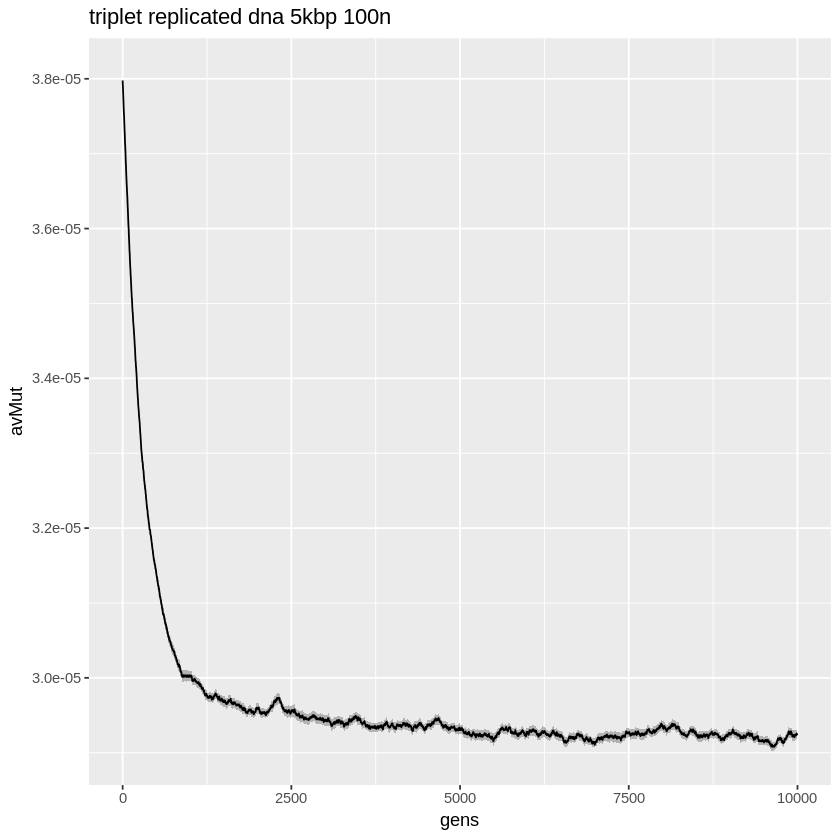

In [22]:
ggplot(triprep_data, aes(gens, avMut))+
    geom_ribbon(aes(ymin = avMut-stderrMut, ymax=avMut+stderrMut), fill = "grey70")+
    geom_line()+
    ggtitle("triplet replicated dna 5kbp 100n")

In [41]:
d_long<- gather(data, trial, value, trial0:trial98, factor_key=TRUE)

In [42]:
head(d_long)

gens,trial,value
0,trial0,3.491181e-05
1,trial0,3.438028e-05
2,trial0,3.387648e-05
3,trial0,3.389465e-05
4,trial0,3.336407e-05
5,trial0,3.283458e-05


Saving 6.67 x 6.67 in image


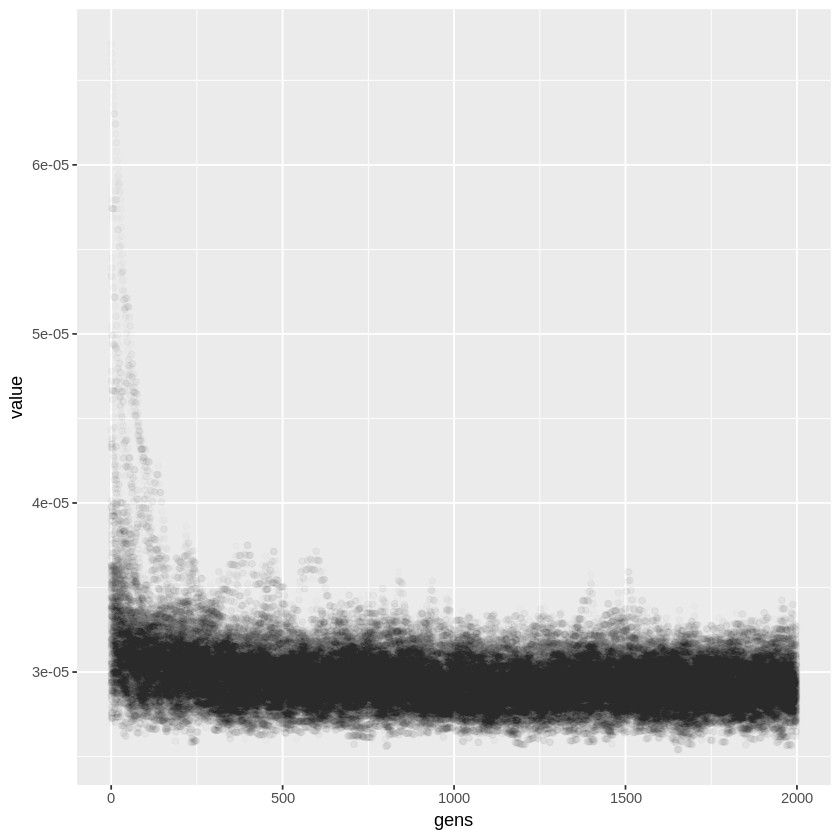

In [53]:
ggplot(d_long, aes(x = gens, y = value)) + 
    geom_point(alpha=0.01)
ggsave("plots/equilibrium_humanIntergenic_100n_1kbp_2xCov_all100.pdf")